In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Cargamos los datos para los modelos de regresion de temperatura máxima y precipitación

datos_temp_max_reg = pd.read_csv("../Datos/datos_temp_max_regresion.csv")
datos_precipitacion_reg = pd.read_csv("../Datos/datos_precipitacion_regresion.csv")

In [3]:
# Movemos la columna "Fecha" en el indice en la tabla de temperatura máxima

# Primero convertimos la columna "Fecha" a tipo datetime
datos_temp_max_reg['Fecha'] = pd.to_datetime(datos_temp_max_reg['Fecha'])
datos_temp_max_reg.set_index('Fecha', inplace=True)
datos_temp_max_reg

,"""Temperatura Máxima""","""Temperatura Media""","""Temperatura Mínima""","""Humedad Relativa Mínima""","""Presion Media""",ETo
Fecha,,,,,,
2017-12-05,12.99,10.95,9.18,77.80,729.88,2.26
2017-12-06,24.83,18.59,12.84,29.50,727.64,5.10
2017-12-07,21.80,16.13,11.67,44.52,728.32,4.42
2017-12-08,19.41,15.09,11.65,51.53,728.51,3.73
2017-12-09,22.50,17.26,14.33,32.88,728.46,4.16
...,...,...,...,...,...,...
2023-11-29,27.06,25.36,24.18,0.23,727.91,2.95
2023-11-30,18.79,15.92,13.79,0.69,729.11,3.05
2023-12-01,23.97,21.53,17.45,0.06,728.22,3.94


In [4]:
# Movemos la columna "Fecha" en el indice en la tabla de precipitación

# Primero convertimos la columna "Fecha" a tipo datetime
datos_precipitacion_reg['Fecha'] = pd.to_datetime(datos_precipitacion_reg['Fecha'])
datos_precipitacion_reg.set_index('Fecha', inplace=True)
datos_precipitacion_reg

,Precipitación,"""Temperatura Máxima""","""Humedad Relativa Máxima""","""Humedad Relativa Media""","""Humedad Relativa Mínima"""
Fecha,,,,,
2017-12-05,25.0,12.99,95.20,89.29,77.80
2017-12-06,7.4,24.83,85.30,56.01,29.50
2017-12-07,0.1,21.80,95.90,71.63,44.52
2017-12-08,9.9,19.41,89.90,67.77,51.53
2017-12-09,2.5,22.50,79.21,60.08,32.88
...,...,...,...,...,...
2025-03-03,1.7,22.24,98.90,68.26,0.03
2025-03-04,5.6,18.15,99.00,86.69,66.26
2025-03-05,1.7,22.37,98.00,56.13,0.02


## Preprocesamiento y Division de los datos

### Datos para validación (Un mes aproximado de datos)

In [5]:
# Datos del mes de noviembre del 2023 para validación
datos_temp_max_reg_val = datos_temp_max_reg[datos_temp_max_reg.index >= "2023-11-01"]
datos_temp_max_reg_val.shape

(32, 6)

In [6]:
# Datos del mes de febrero y algunos dias de marzo del 2025 para validación
datos_precipitacion_reg_val = datos_precipitacion_reg[datos_precipitacion_reg.index >= "2025-02-01"]
datos_precipitacion_reg_val.shape

(35, 5)

In [7]:
# Datos para entrenamiento y pruebas los datos sobrantes

datos_temp_max_reg_train_test = datos_temp_max_reg[datos_temp_max_reg.index < "2023-11-01"]
datos_precipitacion_reg_train_test = datos_precipitacion_reg[datos_precipitacion_reg.index < "2025-02-01"]

print("Cantidad de filas para entrenamiento y pruebas (Temperatura Máxima)): ",datos_temp_max_reg_train_test.shape[0])
print("Cantidad de filas para entrenamiento y pruebas (Precipitación)): ",datos_precipitacion_reg_train_test.shape[0])

Cantidad de filas para entrenamiento y pruebas (Temperatura Máxima)):  2137
Cantidad de filas para entrenamiento y pruebas (Precipitación)):  2590


### Para modelos de regresión de temperatura máxima

In [8]:
# Seleccionamos las variables independientes
X_columns_temp = list(set(datos_temp_max_reg_train_test.columns)-set(['"Temperatura Máxima"']))

# Seleccionamos la variable objetivo
y_columns_temp = ['"Temperatura Máxima"']

# Separamos los datos en conjuntos de entrenamiento y prueba
X_temp = datos_temp_max_reg_train_test[X_columns_temp].values
y_temp = datos_temp_max_reg_train_test[y_columns_temp].values

# Utilizaremos un 70% de los datos para el entrenamiento y un 30% de prueba
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X_temp, y_temp, test_size=0.3, random_state=0)

In [9]:
# Escalamos las variables independientes y la variable objetivo
escalador_temp_x = MinMaxScaler()
X_train_temp_esc = escalador_temp_x.fit_transform(X_train_temp)
X_test_temp_esc = escalador_temp_x.transform(X_test_temp)

escalador_temp_y = MinMaxScaler()
y_train_temp_esc = escalador_temp_y.fit_transform(y_train_temp)
y_test_temp_esc = escalador_temp_y.transform(y_test_temp)

### Para modelos de regresión de precipitación

In [10]:
# Seleccionamos las variables independientes
X_columns_prec = list(set(datos_precipitacion_reg_train_test.columns)-set(['Precipitación']))

# Seleccionamos la variable objetivo
y_columns_prec = ['Precipitación']

# Separamos los datos en conjuntos de entrenamiento y prueba
X_prec = datos_precipitacion_reg_train_test[X_columns_prec].values
y_prec = datos_precipitacion_reg_train_test[y_columns_prec].values

# Utilizaremos un 70% de los datos para el entrenamiento y un 30% de prueba
X_train_prec, X_test_prec, y_train_prec, y_test_prec = train_test_split(X_prec, y_prec, test_size=0.3, random_state=42)

In [11]:
# Escalamos las variables independientes y objetivo
escalador__prec_x = MinMaxScaler()
X_train_prec_esc = escalador__prec_x.fit_transform(X_train_prec)
X_test_prec_esc = escalador__prec_x.transform(X_test_prec)

escalador_prec_y = MinMaxScaler()
y_train_prec_esc = escalador_prec_y.fit_transform(y_train_prec)
y_test_prec_esc = escalador_prec_y.transform(y_test_prec)

## Modelos Regresivos

#### Regresion lineal Temperatura Maxima

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
# Creamos y entrenamos los modelos de regresión lineal con datos escalados y sin escalar
modelo_temp_datos_escalados_lr = LinearRegression()
modelo_temp_datos_escalados_lr.fit(X_train_temp_esc, y_train_temp_esc)

modelo_temp_datos_no_escalados_lr = LinearRegression()
modelo_temp_datos_no_escalados_lr.fit(X_train_temp, y_train_temp)

LinearRegression()

In [14]:
# Realizamos predicciones sobre el conjunto de prueba utilizando nuestros modelos entrenados
y_pred_temp_esc = modelo_temp_datos_escalados_lr.predict(X_test_temp_esc)

y_pred_temp = modelo_temp_datos_no_escalados_lr.predict(X_test_temp)

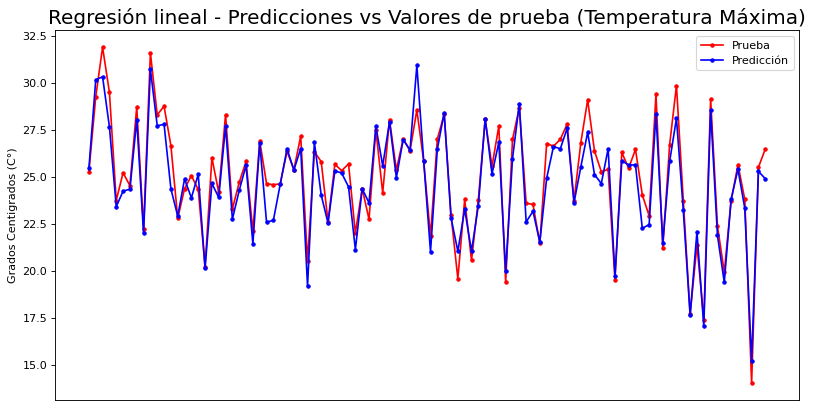

In [15]:
# Graficamos las predicciones contra los valores de prueba

plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title("Regresión lineal - Predicciones vs Valores de prueba (Temperatura Máxima)", fontsize=18)
plt.plot(np.arange(len(y_train_temp), len(y_train_temp) + len(y_test_temp))[:100], y_test_temp.flatten()[:100], 'r',marker='.', label="Prueba")
plt.plot(np.arange(len(y_train_temp), len(y_train_temp) + len(y_test_temp))[:100], y_pred_temp.flatten()[:100], 'b', marker='.', label="Predicción")
plt.xticks([])
plt.ylabel('Grados Centigrados (C°)')
plt.legend()
plt.show()

In [16]:
#Obtenemos los resultados de la métricas resultantes de los modelos de regresión lineal

print('Resultados con datos escalados:')
print('Métrica de MAE:', mean_absolute_error(y_test_temp_esc, y_pred_temp_esc).round(4))
print('Métrica de MSE:', mean_squared_error(y_test_temp_esc, y_pred_temp_esc).round(4))
print('Métrica de R^2:', r2_score(y_test_temp_esc, y_pred_temp_esc).round(4))
print('Resultados sin datos escalados:')
print('Métrica de MAE:', mean_absolute_error(y_test_temp, y_pred_temp).round(4))
print('Métrica de MSE:', mean_squared_error(y_test_temp, y_pred_temp).round(4))
print('Métrica de R^2:', r2_score(y_test_temp, y_pred_temp).round(4))

Resultados con datos escalados:
Métrica de MAE: 0.032
Métrica de MSE: 0.0017
Métrica de R^2: 0.9068
Resultados sin datos escalados:
Métrica de MAE: 0.673
Métrica de MSE: 0.7696
Métrica de R^2: 0.9068


#### Regresion lineal Precipitación

In [17]:
# Creamos y entrenamos los modelos de regresión lineal con datos escalados y sin escalar

modelo_prec_datos_escalados_lr = LinearRegression()
modelo_prec_datos_escalados_lr.fit(X_train_prec_esc, y_train_prec_esc)

modelo_prec_datos_no_escalados_lr = LinearRegression()
modelo_prec_datos_no_escalados_lr.fit(X_train_prec, y_train_prec)

LinearRegression()

In [18]:
# Realizamos predicciones sobre el conjunto de prueba utilizando nuestro modelo entrenado
y_pred_prec_esc = modelo_prec_datos_escalados_lr.predict(X_test_prec_esc)

y_pred_prec = modelo_prec_datos_no_escalados_lr.predict(X_test_prec)

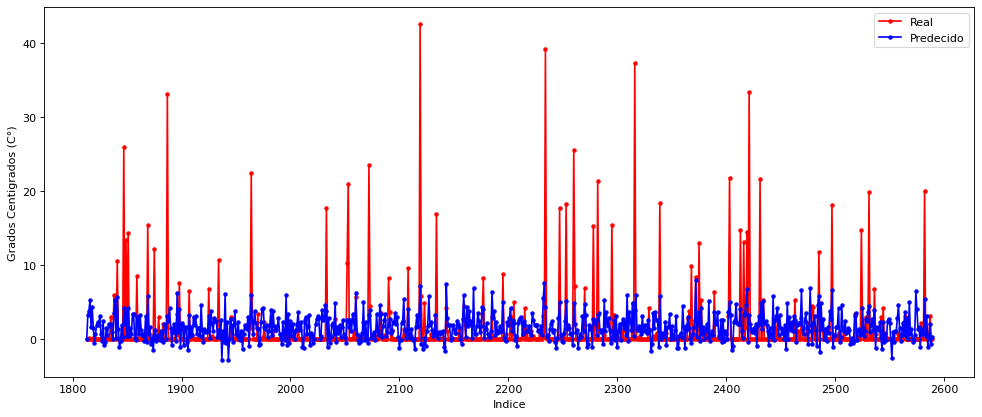

In [19]:
# Graficamos las predicciones contra los valores de prueba

plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(np.arange(len(y_train_prec), len(y_train_prec) + len(y_test_prec)), y_test_prec.flatten(), 'r',marker='.', label="Real")
plt.plot(np.arange(len(y_train_prec), len(y_train_prec) + len(y_test_prec)), y_pred_prec.flatten(), 'b', marker='.', label="Predecido")
plt.ylabel('Grados Centigrados (C°)')
plt.xlabel('Indice')
plt.legend()
plt.show()

In [20]:
#Obtenemos los resultados de la métricas resultantes de los modelos de regresión lineal

print('Resultados con datos escalados:')
print('Métrica de MAE:', mean_absolute_error(y_test_prec_esc, y_pred_prec_esc).round(4))
print('Métrica de MSE:', mean_squared_error(y_test_prec_esc, y_pred_prec_esc).round(4))
print('Métrica de R^2:', r2_score(y_test_prec_esc, y_pred_prec_esc).round(4))
print('Resultados sin datos escalados:')
print('Métrica de MAE:', mean_absolute_error(y_test_prec, y_pred_prec).round(4))
print('Métrica de MSE:', mean_squared_error(y_test_prec, y_pred_prec).round(4))
print('Métrica de R^2:', r2_score(y_test_prec, y_pred_prec).round(4))

Resultados con datos escalados:
Métrica de MAE: 0.053
Métrica de MSE: 0.0105
Métrica de R^2: 0.1305
Resultados sin datos escalados:
Métrica de MAE: 2.242
Métrica de MSE: 18.7575
Métrica de R^2: 0.1305


#### Regresion K-Vecinos mas cercanos (KNN) - Temperatura Máxima

In [21]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

import seaborn as sns

In [22]:
# Realizamos una validacion cruzada para determinar el mejor valor de K

valores_k = [i for i in range (3,31,2)]
precisiones = []
mejor_valor_K = 5
mejor_precision = -1

for k in valores_k:
    knn = KNeighborsRegressor(n_neighbors=k)
    precision = cross_val_score(knn, X_train_temp_esc, y_train_temp_esc, cv=5)
    if np.mean(precision) > mejor_precision:
        mejor_valor_K = k
        mejor_precision = np.mean(precision)
    precisiones.append(np.mean(precision))

Mejor valor de K es:  3
Con una precisión obtenida de:  0.8696


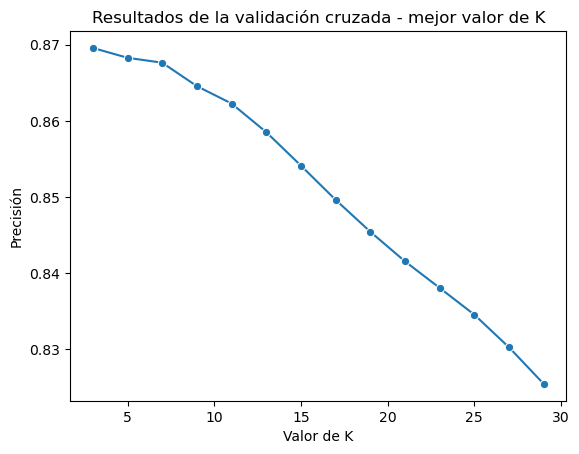

In [23]:
#Graficamos el resultado de la validación cruzada obteniendo el mejor valor de K

sns.lineplot(x = valores_k, y = precisiones, marker = 'o')
plt.title("Resultados de la validación cruzada - mejor valor de K")
plt.xlabel("Valor de K")
plt.ylabel("Precisión")
print("Mejor valor de K es: ", mejor_valor_K)
print("Con una precisión obtenida de: ", mejor_precision.round(4))

In [24]:
# Creamos y entrenamos los modelos de KNN con datos escalados y sin escalar con el mejor valor de K obtenido

modelo_temp_datos_escalados_knn = KNeighborsRegressor(n_neighbors=mejor_valor_K)
modelo_temp_datos_escalados_knn.fit(X_train_temp_esc, y_train_temp_esc)

modelo_temp_datos_no_escalados_knn = KNeighborsRegressor(n_neighbors=mejor_valor_K)
modelo_temp_datos_no_escalados_knn.fit(X_train_temp, y_train_temp)

KNeighborsRegressor(n_neighbors=3)

In [25]:
# Realizamos predicciones sobre el conjunto de prueba utilizando nuestro modelo entrenado
y_pred_temp_esc = modelo_temp_datos_escalados_knn.predict(X_test_temp_esc)

y_pred_temp = modelo_temp_datos_no_escalados_knn.predict(X_test_temp)

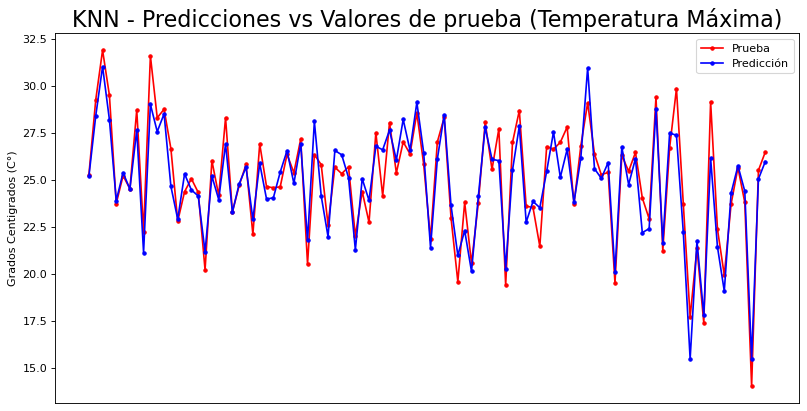

In [26]:
# Graficamos las predicciones contra los valores de prueba

plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title("KNN - Predicciones vs Valores de prueba (Temperatura Máxima)", fontsize=20)
plt.plot(np.arange(len(y_train_temp), len(y_train_temp) + len(y_test_temp))[:100], y_test_temp.flatten()[:100], 'r',marker='.', label="Prueba")
plt.plot(np.arange(len(y_train_temp), len(y_train_temp) + len(y_test_temp))[:100], y_pred_temp.flatten()[:100], 'b', marker='.', label="Predicción")
plt.xticks([])
plt.ylabel('Grados Centigrados (C°)')
plt.legend()
plt.show()

In [27]:
#Obtenemos los resultados de la métricas resultantes de los modelos de KNN

print('Resultados con datos escalados:')
print('Métrica de MAE:', mean_absolute_error(y_test_temp_esc, y_pred_temp_esc).round(4))
print('Métrica de MSE:', mean_squared_error(y_test_temp_esc, y_pred_temp_esc).round(4))
print('Métrica de R^2:', r2_score(y_test_temp_esc, y_pred_temp_esc).round(4))
print('Resultados sin datos escalados:')
print('Métrica de MAE:', mean_absolute_error(y_test_temp, y_pred_temp).round(4))
print('Métrica de MSE:', mean_squared_error(y_test_temp, y_pred_temp).round(4))
print('Métrica de R^2:', r2_score(y_test_temp, y_pred_temp).round(4))

Resultados con datos escalados:
Métrica de MAE: 0.0373
Métrica de MSE: 0.0023
Métrica de R^2: 0.8756
Resultados sin datos escalados:
Métrica de MAE: 0.9177
Métrica de MSE: 1.3949
Métrica de R^2: 0.8311


#### Regresion K-Vecinos mas cercanos (KNN) - Precipitación

In [28]:
# Realizamos una validacion cruzada para determinar el mejor valor de K

valores_k = [i for i in range (3,31,2)]
precisiones = []
mejor_valor_K = -1
mejor_precision = -1

for k in valores_k:
    knn = KNeighborsRegressor(n_neighbors=k)
    precision = cross_val_score(knn, X_train_prec_esc, y_train_prec_esc, cv=5)
    if np.mean(precision) > mejor_precision:
        mejor_valor_K = k
        mejor_precision = np.mean(precision)
    precisiones.append(np.mean(precision))

Mejor valor de K es:  15
Con una precisión obtenida de:  0.2286


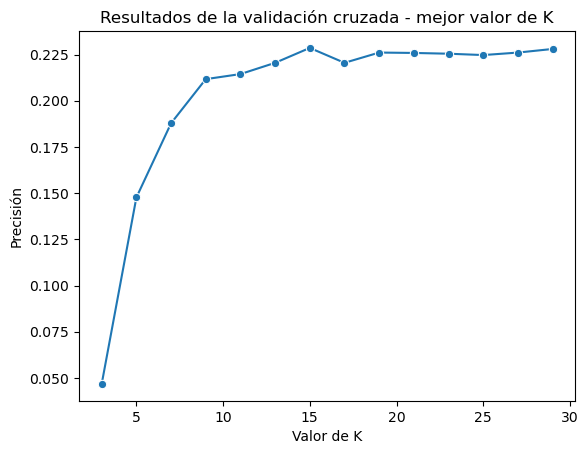

In [29]:
#Graficamos el resultado de la validación cruzada obteniendo el mejor valor de K

sns.lineplot(x = valores_k, y = precisiones, marker = 'o')
plt.title("Resultados de la validación cruzada - mejor valor de K")
plt.xlabel("Valor de K")
plt.ylabel("Precisión")
print("Mejor valor de K es: ", mejor_valor_K)
print("Con una precisión obtenida de: ", mejor_precision.round(4))

In [30]:
# Creamos y entrenamos los modelos de KNN con datos escalados y sin escalar con el mejor valor de K obtenido

modelo_prec_datos_escalados_knn = KNeighborsRegressor(n_neighbors=mejor_valor_K)
modelo_prec_datos_escalados_knn.fit(X_train_prec_esc, y_train_prec_esc)

modelo_prec_datos_no_escalados_knn = KNeighborsRegressor(n_neighbors=mejor_valor_K)
modelo_prec_datos_no_escalados_knn.fit(X_train_prec, y_train_prec)

KNeighborsRegressor(n_neighbors=15)

In [31]:
# Realizamos predicciones sobre el conjunto de prueba utilizando nuestro modelo entrenado
y_pred_prec_esc = modelo_prec_datos_escalados_knn.predict(X_test_prec_esc)

y_pred_prec = modelo_prec_datos_no_escalados_knn.predict(X_test_prec)

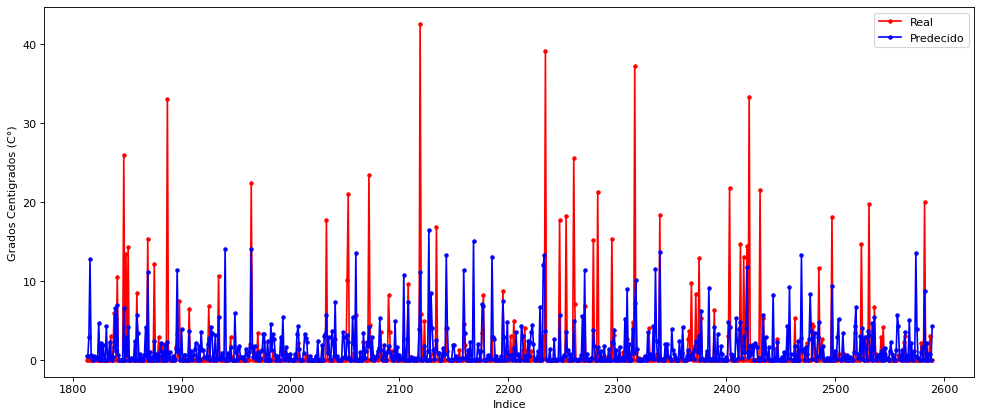

In [32]:
# Graficamos las predicciones contra los valores de prueba

plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(np.arange(len(y_train_prec), len(y_train_prec) + len(y_test_prec)), y_test_prec.flatten(), 'r',marker='.', label="Real")
plt.plot(np.arange(len(y_train_prec), len(y_train_prec) + len(y_test_prec)), y_pred_prec.flatten(), 'b', marker='.', label="Predecido")
plt.ylabel('Grados Centigrados (C°)')
plt.xlabel('Indice')
plt.legend()
plt.show()

In [33]:
#Obtenemos los resultados de la métricas resultantes de los modelos de KNN

print('Resultados con datos escalados:')
print('Métrica de MAE:', mean_absolute_error(y_test_prec_esc, y_pred_prec_esc).round(4))
print('Métrica de MSE:', mean_squared_error(y_test_prec_esc, y_pred_prec_esc).round(4))
print('Métrica de R^2:', r2_score(y_test_prec_esc, y_pred_prec_esc).round(4))
print('Resultados sin datos escalados:')
print('Métrica de MAE:', mean_absolute_error(y_test_prec, y_pred_prec).round(4))
print('Métrica de MSE:', mean_squared_error(y_test_prec, y_pred_prec).round(4))
print('Métrica de R^2:', r2_score(y_test_prec, y_pred_prec).round(4))

Resultados con datos escalados:
Métrica de MAE: 0.0429
Métrica de MSE: 0.0103
Métrica de R^2: 0.144
Resultados sin datos escalados:
Métrica de MAE: 1.8623
Métrica de MSE: 19.1741
Métrica de R^2: 0.1111


#### Regresion de maquinas de vectores de soporte (SVM) - Temperatura Máxima

In [34]:
from sklearn.svm import SVR 

In [35]:
# Creamos y entrenamos los modelos de SVR (SVM) con datos escalados y sin escalar

modelo_temp_datos_escalados_svr = SVR(kernel='linear')
modelo_temp_datos_escalados_svr.fit(X_train_temp_esc, y_train_temp_esc.flatten())

modelo_temp_datos_no_escalados_svr = SVR(kernel='linear')
modelo_temp_datos_no_escalados_svr.fit(X_train_temp, y_train_temp.flatten())

SVR(kernel='linear')

In [36]:
# Realizamos predicciones sobre el conjunto de prueba utilizando nuestro modelo entrenado
y_pred_temp_esc = modelo_temp_datos_escalados_svr.predict(X_test_temp_esc)

y_pred_temp = modelo_temp_datos_no_escalados_svr.predict(X_test_temp)

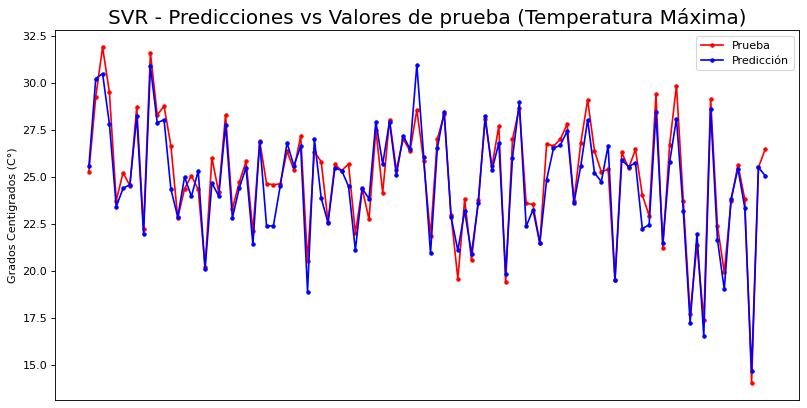

In [37]:
# Graficamos las predicciones contra los valores de prueba

plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title("SVR - Predicciones vs Valores de prueba (Temperatura Máxima)", fontsize=18)
plt.plot(np.arange(len(y_train_temp), len(y_train_temp) + len(y_test_temp))[:100], y_test_temp.flatten()[:100], 'r',marker='.', label="Prueba")
plt.plot(np.arange(len(y_train_temp), len(y_train_temp) + len(y_test_temp))[:100], y_pred_temp.flatten()[:100], 'b', marker='.', label="Predicción")
plt.xticks([])
plt.ylabel('Grados Centigrados (C°)')
plt.legend()
plt.show()

In [38]:
#Obtenemos los resultados de la métricas resultantes de los modelos de SVR (SVM)

print('Resultados con datos escalados:')
print('Métrica de MAE:', mean_absolute_error(y_test_temp_esc, y_pred_temp_esc).round(4))
print('Métrica de MSE:', mean_squared_error(y_test_temp_esc, y_pred_temp_esc).round(4))
print('Métrica de R^2:', r2_score(y_test_temp_esc, y_pred_temp_esc).round(4))
print('Resultados sin datos escalados:')
print('Métrica de MAE:', mean_absolute_error(y_test_temp, y_pred_temp).round(4))
print('Métrica de MSE:', mean_squared_error(y_test_temp, y_pred_temp).round(4))
print('Métrica de R^2:', r2_score(y_test_temp, y_pred_temp).round(4))

Resultados con datos escalados:
Métrica de MAE: 0.0408
Métrica de MSE: 0.0024
Métrica de R^2: 0.8699
Resultados sin datos escalados:
Métrica de MAE: 0.6866
Métrica de MSE: 0.8113
Métrica de R^2: 0.9018


#### Regresion de maquinas de vectores de soporte (SVM) - Precipitación

In [39]:
# Creamos y entrenamos los modelos de SVR (SVM) con datos escalados y sin escalar

modelo_prec_datos_escalados_svr = SVR(kernel='poly')
modelo_prec_datos_escalados_svr.fit(X_train_prec_esc, y_train_prec_esc.flatten())

modelo_prec_datos_no_escalados_svr = SVR(kernel='poly')
modelo_prec_datos_no_escalados_svr.fit(X_train_prec, y_train_prec.flatten())

SVR(kernel='poly')

In [40]:
# Realizamos predicciones sobre el conjunto de prueba utilizando nuestro modelo entrenado
y_pred_prec_esc = modelo_prec_datos_escalados_svr.predict(X_test_prec_esc)

y_pred_prec = modelo_prec_datos_no_escalados_svr.predict(X_test_prec)

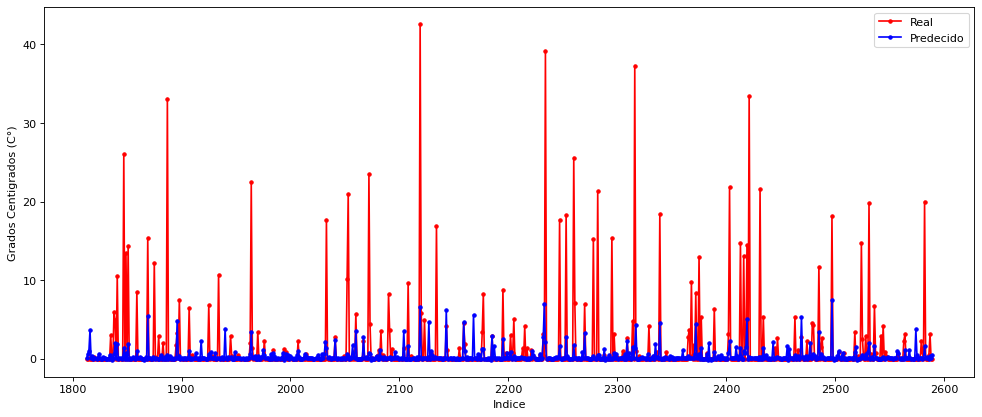

In [41]:
# Graficamos las predicciones contra los valores de prueba

plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(np.arange(len(y_train_prec), len(y_train_prec) + len(y_test_prec)), y_test_prec.flatten(), 'r',marker='.', label="Real")
plt.plot(np.arange(len(y_train_prec), len(y_train_prec) + len(y_test_prec)), y_pred_prec.flatten(), 'b', marker='.', label="Predecido")
plt.ylabel('Grados Centigrados (C°)')
plt.xlabel('Indice')
plt.legend()
plt.show()

In [42]:
#Obtenemos los resultados de la métricas resultantes de los modelos de SVR (SVM)

print('Resultados con datos escalados:')
print('Métrica de MAE:', mean_absolute_error(y_test_prec_esc, y_pred_prec_esc).round(4))
print('Métrica de MSE:', mean_squared_error(y_test_prec_esc, y_pred_prec_esc).round(4))
print('Métrica de R^2:', r2_score(y_test_prec_esc, y_pred_prec_esc).round(4))
print('Resultados sin datos escalados:')
print('Métrica de MAE:', mean_absolute_error(y_test_prec, y_pred_prec).round(4))
print('Métrica de MSE:', mean_squared_error(y_test_prec, y_pred_prec).round(4))
print('Métrica de R^2:', r2_score(y_test_prec, y_pred_prec).round(4))

Resultados con datos escalados:
Métrica de MAE: 0.1047
Métrica de MSE: 0.0163
Métrica de R^2: -0.3497
Resultados sin datos escalados:
Métrica de MAE: 1.3344
Métrica de MSE: 19.8334
Métrica de R^2: 0.0806


#### Regresion de Arboles aleatorios (Random Forest) - Temperatura Máxima

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
# Creamos y entrenamos los modelos de bosques aleatorios con datos escalados y sin escalar

modelo_temp_datos_escalados_rf = RandomForestRegressor(random_state=10)
modelo_temp_datos_escalados_rf.fit(X_train_temp_esc, y_train_temp_esc.flatten())

modelo_temp_datos_no_escalados_rf = RandomForestRegressor(random_state=10)
modelo_temp_datos_no_escalados_rf.fit(X_train_temp, y_train_temp.flatten())

RandomForestRegressor(random_state=10)

In [45]:
# Realizamos predicciones sobre el conjunto de prueba utilizando nuestro modelo entrenado
y_pred_temp_esc = modelo_temp_datos_escalados_rf.predict(X_test_temp_esc)

y_pred_temp = modelo_temp_datos_no_escalados_rf.predict(X_test_temp)

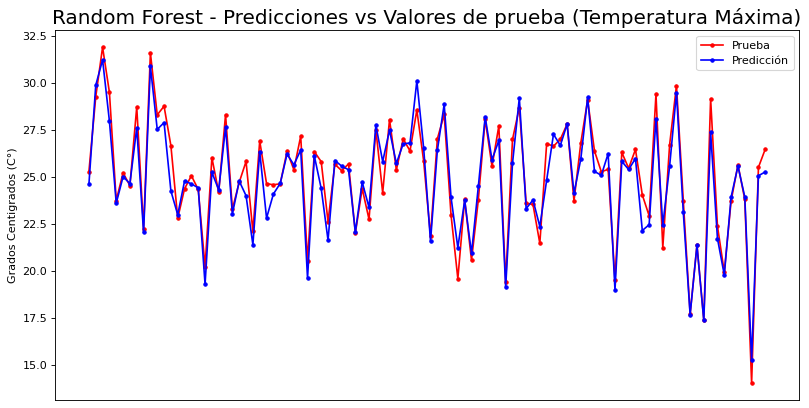

In [46]:
# Graficamos las predicciones contra los valores de prueba

plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title("Random Forest - Predicciones vs Valores de prueba (Temperatura Máxima)", fontsize=18)
plt.plot(np.arange(len(y_train_temp), len(y_train_temp) + len(y_test_temp))[:100], y_test_temp.flatten()[:100], 'r',marker='.', label="Prueba")
plt.plot(np.arange(len(y_train_temp), len(y_train_temp) + len(y_test_temp))[:100], y_pred_temp.flatten()[:100], 'b', marker='.', label="Predicción")
plt.xticks([])
plt.ylabel('Grados Centigrados (C°)')
plt.legend()
plt.show()

In [47]:
#Obtenemos los resultados de la métricas resultantes de los modelos de bosques aleatorios

print('Resultados con datos escalados:')
print('Métrica de MAE:', mean_absolute_error(y_test_temp_esc, y_pred_temp_esc).round(4))
print('Métrica de MSE:', mean_squared_error(y_test_temp_esc, y_pred_temp_esc).round(4))
print('Métrica de R^2:', r2_score(y_test_temp_esc, y_pred_temp_esc).round(4))
print('Resultados sin datos escalados:')
print('Métrica de MAE:', mean_absolute_error(y_test_temp, y_pred_temp).round(4))
print('Métrica de MSE:', mean_squared_error(y_test_temp, y_pred_temp).round(4))
print('Métrica de R^2:', r2_score(y_test_temp, y_pred_temp).round(4))

Resultados con datos escalados:
Métrica de MAE: 0.03
Métrica de MSE: 0.0016
Métrica de R^2: 0.9148
Resultados sin datos escalados:
Métrica de MAE: 0.6308
Métrica de MSE: 0.6992
Métrica de R^2: 0.9154


#### Validacion cruzada (GridSearchCV)

In [48]:
# Seleccionamos varios parametros para realizar una validación cruzada al modelo de bosques aleatorios

param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [None, 40],
    'min_samples_leaf': [1, 2]
}

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
# Ingresamos el modelo creado anteoriormente de bosques aleatorios, junto con los parametros seleccionados anteriormente

modelo_temp_datos_no_escalados_rf_cv = GridSearchCV(estimator=modelo_temp_datos_no_escalados_rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')

In [51]:
# Realizamos el entrenamiento del nuevo modelo ajustado despues de la validación cruzada

modelo_temp_datos_no_escalados_rf_cv.fit(X_train_temp, y_train_temp.flatten())

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=10),
             param_grid={'max_depth': [None, 40], 'min_samples_leaf': [1, 2],
                         'n_estimators': [100, 150]},
             scoring='neg_mean_squared_error')

In [52]:
# Realizamos predicciones con el nuevo modelo 

y_pred_temp = modelo_temp_datos_no_escalados_rf_cv.predict(X_test_temp)

In [53]:
# Obtenemos las metricas resultantes con lo mejores parametros encontrados

print('Resultados sin datos escalados:')
print('Métrica de MAE:', mean_absolute_error(y_test_temp, y_pred_temp).round(4))
print('Métrica de MSE:', mean_squared_error(y_test_temp, y_pred_temp).round(4))
print('Métrica de R^2:', r2_score(y_test_temp, y_pred_temp).round(4))
print('Mejores parametros encontrados: ',modelo_temp_datos_no_escalados_rf_cv.best_params_)

Resultados sin datos escalados:
Métrica de MAE: 0.6288
Métrica de MSE: 0.693
Métrica de R^2: 0.9161
Mejores parametros encontrados:  {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 150}


#### Regresion de Arboles aleatorios (Random Forest) - Precipitación

In [54]:
# Creamos y entrenamos los modelos de bosques aleatorios con datos escalados y sin escalar

modelo_prec_datos_escalados_rf = RandomForestRegressor(random_state=0)
modelo_prec_datos_escalados_rf.fit(X_train_prec_esc, y_train_prec_esc.flatten())

modelo_prec_datos_no_escalados_rf = RandomForestRegressor(random_state=0)
modelo_prec_datos_no_escalados_rf.fit(X_train_prec, y_train_prec.flatten())

RandomForestRegressor(random_state=0)

In [55]:
# Realizamos predicciones sobre el conjunto de prueba utilizando nuestro modelo entrenado
y_pred_prec_esc = modelo_prec_datos_escalados_rf.predict(X_test_prec_esc)

y_pred_prec = modelo_prec_datos_no_escalados_rf.predict(X_test_prec)

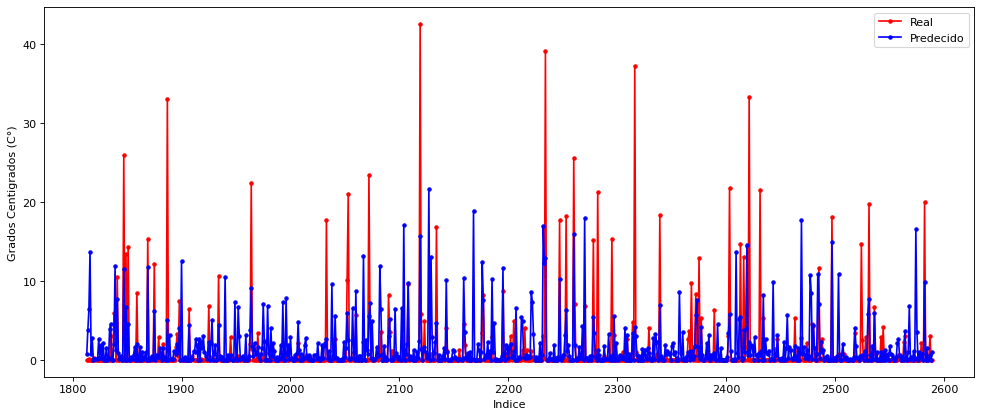

In [56]:
# Graficamos las predicciones contra los valores de prueba

plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(np.arange(len(y_train_prec), len(y_train_prec) + len(y_test_prec)), y_test_prec.flatten(), 'r',marker='.', label="Real")
plt.plot(np.arange(len(y_train_prec), len(y_train_prec) + len(y_test_prec)), y_pred_prec.flatten(), 'b', marker='.', label="Predecido")
plt.ylabel('Grados Centigrados (C°)')
plt.xlabel('Indice')
plt.legend()
plt.show()

In [57]:
#Obtenemos los resultados de la métricas resultantes de los modelos de bosques aleatorios

print('Resultados con datos escalados:')
print('Métrica de MAE:', mean_absolute_error(y_test_prec_esc, y_pred_prec_esc).round(4))
print('Métrica de MSE:', mean_squared_error(y_test_prec_esc, y_pred_prec_esc).round(4))
print('Métrica de R^2:', r2_score(y_test_prec_esc, y_pred_prec_esc).round(4))
print('Resultados sin datos escalados:')
print('Métrica de MAE:', mean_absolute_error(y_test_prec, y_pred_prec).round(4))
print('Métrica de MSE:', mean_squared_error(y_test_prec, y_pred_prec).round(4))
print('Métrica de R^2:', r2_score(y_test_prec, y_pred_prec).round(4))

Resultados con datos escalados:
Métrica de MAE: 0.0438
Métrica de MSE: 0.0104
Métrica de R^2: 0.1334
Resultados sin datos escalados:
Métrica de MAE: 1.8602
Métrica de MSE: 18.8837
Métrica de R^2: 0.1246


In [58]:
# Seleccionamos varios parametros para realizar una validación cruzada al modelo de bosques aleatorios

param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [None, 5, 6, 7],
    'min_samples_leaf': [20, 30]
}

In [59]:
# Ingresamos el modelo creado anteoriormente de bosques aleatorios, junto con los parametros seleccionados anteriormente

modelo_prec_datos_no_escalados_rf_cv = GridSearchCV(estimator=modelo_prec_datos_no_escalados_rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')

In [60]:
# Realizamos el entrenamiento del nuevo modelo ajustado despues de la validación cruzada

modelo_prec_datos_no_escalados_rf_cv.fit(X_train_prec, y_train_prec.flatten())

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [None, 5, 6, 7],
                         'min_samples_leaf': [20, 30],
                         'n_estimators': [100, 150]},
             scoring='neg_mean_squared_error')

In [61]:
# Realizamos predicciones con el nuevo modelo 

y_pred_prec_cv = modelo_prec_datos_no_escalados_rf_cv.predict(X_test_prec)

In [63]:
# Obtenemos las metricas resultantes con lo mejores parametros encontrados

print('Resultados sin datos escalados:')
print('Métrica de MAE:', mean_absolute_error(y_test_prec, y_pred_prec_cv).round(4))
print('Métrica de MSE:', mean_squared_error(y_test_prec, y_pred_prec_cv).round(4))
print('Métrica de R^2:', r2_score(y_test_prec, y_pred_prec_cv).round(4))
print('Mejores parametros encontrados: ',modelo_prec_datos_no_escalados_rf_cv.best_params_)

Resultados sin datos escalados:
Métrica de MAE: 1.7363
Métrica de MSE: 16.4325
Métrica de R^2: 0.2382
Mejores parametros encontrados:  {'max_depth': 7, 'min_samples_leaf': 20, 'n_estimators': 100}


### Validando el mejor modelo de regresión (Bosques Aleatorios - Temperatura Máxima)

In [129]:
datos_temp_max_reg_val.head()

,"""Temperatura Máxima""","""Temperatura Media""","""Temperatura Mínima""","""Humedad Relativa Mínima""","""Presion Media""",ETo
Fecha,,,,,,
2023-11-01,29.34,27.94,25.29,11.89,726.21,3.53
2023-11-02,30.76,29.45,27.97,11.22,726.36,3.07
2023-11-03,28.94,28.16,26.13,2.10,728.17,2.97
2023-11-04,28.61,20.75,14.50,0.56,727.90,5.78
2023-11-05,31.75,30.53,27.97,0.60,728.74,3.63


In [130]:
# Seleccionamos las variables independientes para la prediccion de la temperatura máxima utilizando los datos de validación

columnas_X = list(set(datos_temp_max_reg_val.columns)-set(['"Temperatura Máxima"']))
X_prec_val = datos_temp_max_reg_val[columnas_X].values

In [131]:
#Realizamos las predicciones con los datos sin escalar

predicciones =  modelo_temp_datos_no_escalados_rf_cv.predict(X_prec_val)

In [132]:
#Realizamos una copia de los datos originales de validación

datos_temp_max_pred_vs_real_rf_cv = datos_temp_max_reg_val.copy()

In [133]:
# Creamos una nueva columna con los valores predichos y mostramos el valor original con las predichas

datos_temp_max_pred_vs_real_rf_cv['Predicciones'] = predicciones
datos_temp_max_pred_vs_real_rf_cv[['"Temperatura Máxima"','Predicciones']].head(10)

,"""Temperatura Máxima""",Predicciones
Fecha,,
2023-11-01,29.34,29.208133
2023-11-02,30.76,29.910000
2023-11-03,28.94,29.011400
2023-11-04,28.61,28.683867
2023-11-05,31.75,30.789800
2023-11-06,28.59,28.458467
2023-11-07,29.56,28.432267
2023-11-08,30.44,30.087867
2023-11-09,27.15,26.935533


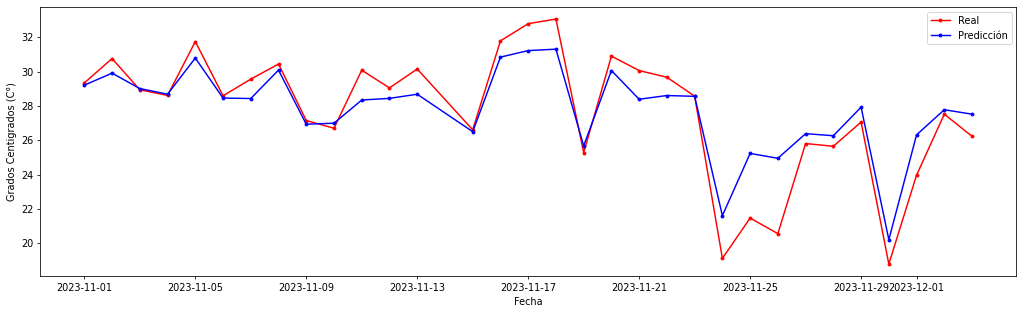

In [134]:
# Graficamos valores reales contra las predicciones

plt.figure(num=None, figsize=(18, 5), dpi=70, facecolor='w', edgecolor='k')
plt.plot(datos_temp_max_pred_vs_real_rf_cv['"Temperatura Máxima"'], 'r',marker='.', label="Real")
plt.plot(datos_temp_max_pred_vs_real_rf_cv['Predicciones'], 'b',marker='.', label="Predicción")
plt.ylabel('Grados Centigrados (C°)')
plt.xlabel('Fecha')
plt.legend()
plt.show()

In [135]:
# Mostramos metricas generadas de las predicciones

print('Resultados sin datos escalados (Bosques Aleatorios):')
print('Métrica de MAE:', mean_absolute_error(datos_temp_max_pred_vs_real_rf_cv['"Temperatura Máxima"'], predicciones).round(4))
print('Métrica de MSE:', mean_squared_error(datos_temp_max_pred_vs_real_rf_cv['"Temperatura Máxima"'], predicciones).round(4))
print('Métrica de R^2:', r2_score(datos_temp_max_pred_vs_real_rf_cv['"Temperatura Máxima"'], predicciones).round(4))

Resultados sin datos escalados (Bosques Aleatorios):
Métrica de MAE: 1.0748
Métrica de MSE: 2.1983
Métrica de R^2: 0.8338


### Validando el segundo mejor modelo de regresión (Regresión Lineal - datos sin escalar - Temperatura Máxima)

In [136]:
# Seleccionamos las variables independientes para la prediccion de la temperatura máxima utilizando los datos de validación

columnas_X = list(set(datos_temp_max_reg_val.columns)-set(['"Temperatura Máxima"']))
X_prec_val = datos_temp_max_reg_val[columnas_X].values

In [137]:
#Realizamos las predicciones con los datos sin escalar

predicciones =  modelo_temp_datos_no_escalados_lr.predict(X_prec_val)

In [138]:
#Realizamos una copia de los datos originales de validación

datos_temp_max_pred_vs_real_lr = datos_temp_max_reg_val.copy()

In [139]:
# Creamos una nueva columna con los valores predichos y mostramos el valor original con las predichas

datos_temp_max_pred_vs_real_lr['Predicciones'] = predicciones
datos_temp_max_pred_vs_real_lr[['"Temperatura Máxima"','Predicciones']].head(10)

,"""Temperatura Máxima""",Predicciones
Fecha,,
2023-11-01,29.34,29.464790
2023-11-02,30.76,29.343347
2023-11-03,28.94,28.835521
2023-11-04,28.61,29.007723
2023-11-05,31.75,31.477106
2023-11-06,28.59,27.437392
2023-11-07,29.56,28.462252
2023-11-08,30.44,29.053967
2023-11-09,27.15,28.734693


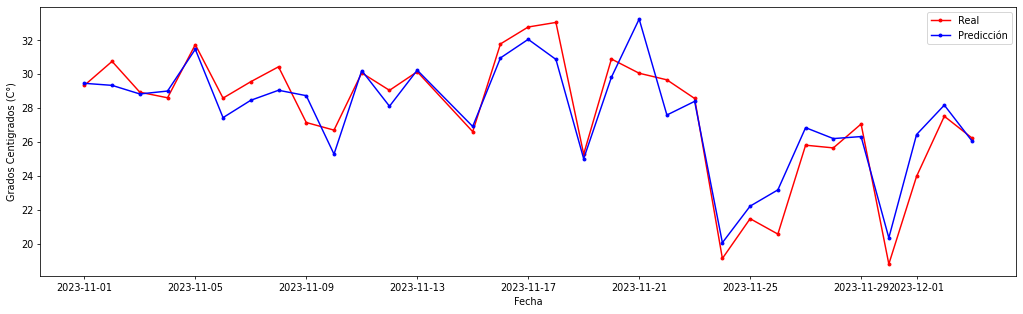

In [140]:
# Graficamos valores reales contra las predicciones

plt.figure(num=None, figsize=(18, 5), dpi=70, facecolor='w', edgecolor='k')
plt.plot(datos_temp_max_pred_vs_real_lr['"Temperatura Máxima"'], 'r',marker='.', label="Real")
plt.plot(datos_temp_max_pred_vs_real_lr['Predicciones'], 'b',marker='.', label="Predicción")
plt.ylabel('Grados Centigrados (C°)')
plt.xlabel('Fecha')
plt.legend()
plt.show()

In [141]:
# Mostramos metricas generadas de las predicciones

print('Resultados sin datos escalados (Regresión lineal):')
print('Métrica de MAE:', mean_absolute_error(datos_temp_max_pred_vs_real_lr['"Temperatura Máxima"'], predicciones).round(4))
print('Métrica de MSE:', mean_squared_error(datos_temp_max_pred_vs_real_lr['"Temperatura Máxima"'], predicciones).round(4))
print('Métrica de R^2:', r2_score(datos_temp_max_pred_vs_real_lr['"Temperatura Máxima"'], predicciones).round(4))

Resultados sin datos escalados (Regresión lineal):
Métrica de MAE: 1.0132
Métrica de MSE: 1.6613
Métrica de R^2: 0.8744


### Validando el segundo mejor modelo de regresión (Regresión Lineal- Datos escalados - Temperatura Máxima)

In [142]:
# Seleccionamos las variables independientes para la prediccion de la temperatura máxima utilizando los datos de validación

columnas_X = list(set(datos_temp_max_reg_val.columns)-set(['"Temperatura Máxima"']))
X_prec_val = datos_temp_max_reg_val[columnas_X].values

In [143]:
# Escalamos los datos

X_prec_val_esc = escalador_temp_x.transform(X_prec_val)
X_prec_val_esc

array([[8.32503556e-01, 3.95430580e-01, 2.00169635e-01, 1.42565947e-01,
        8.27910959e-01],
       [9.27809388e-01, 3.14586995e-01, 2.12892282e-01, 1.34532374e-01,
        8.92551370e-01],
       [8.62375533e-01, 2.97012302e-01, 3.66412214e-01, 2.51798561e-02,
        8.37328767e-01],
       [4.48790896e-01, 7.90861160e-01, 3.43511450e-01, 6.71462830e-03,
        5.20119863e-01],
       [9.27809388e-01, 4.13005272e-01, 4.14758270e-01, 7.19424460e-03,
        9.38784247e-01],
       [8.63442390e-01, 2.60105448e-01, 5.21628499e-01, 1.43884892e-03,
        8.00513699e-01],
       [7.84139403e-01, 5.04393673e-01, 5.05513147e-01, 8.04556355e-02,
        7.50428082e-01],
       [9.08250356e-01, 3.35676626e-01, 5.24173028e-01, 1.50839329e-01,
        8.72431507e-01],
       [5.67211949e-01, 6.25659051e-01, 5.05513147e-01, 9.59232614e-04,
        6.08732877e-01],
       [8.38904694e-01, 1.12478032e-01, 3.67260390e-01, 2.68105516e-01,
        7.54708904e-01],
       [7.57467994e-01, 5.8347

In [144]:
# Realizamos las predicciones con los datos escalados

predicciones =  modelo_temp_datos_escalados_lr.predict(X_prec_val_esc)

In [145]:
# Realizamos una copia de los datos originales de validación

datos_temp_max_pred_vs_real_lr_esc = datos_temp_max_reg_val.copy()

In [146]:
#Reescalamos los datos a su valor original

predicciones_resc = escalador_temp_y.inverse_transform(predicciones)

In [147]:
# Creamos una nueva columna con los valores predichos y mostramos el valor original con las predichas

datos_temp_max_pred_vs_real_lr_esc['Predicciones'] = predicciones_resc
datos_temp_max_pred_vs_real_lr_esc[['"Temperatura Máxima"','Predicciones']].head(10)

,"""Temperatura Máxima""",Predicciones
Fecha,,
2023-11-01,29.34,29.464790
2023-11-02,30.76,29.343347
2023-11-03,28.94,28.835521
2023-11-04,28.61,29.007723
2023-11-05,31.75,31.477106
2023-11-06,28.59,27.437392
2023-11-07,29.56,28.462252
2023-11-08,30.44,29.053967
2023-11-09,27.15,28.734693


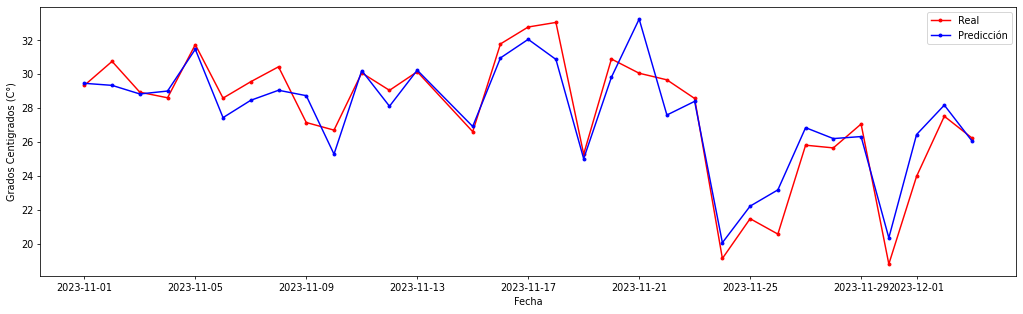

In [148]:
# Graficamos valores reales contra las predicciones

plt.figure(num=None, figsize=(18, 5), dpi=70, facecolor='w', edgecolor='k')
plt.plot(datos_temp_max_pred_vs_real_lr_esc['"Temperatura Máxima"'], 'r',marker='.', label="Real")
plt.plot(datos_temp_max_pred_vs_real_lr_esc['Predicciones'], 'b',marker='.', label="Predicción")
plt.ylabel('Grados Centigrados (C°)')
plt.xlabel('Fecha')
plt.legend()
plt.show()

In [149]:
# Mostramos metricas generadas de las predicciones

print('Resultados datos escalados (Regresión lineal):')
print('Métrica de MAE:', mean_absolute_error(datos_temp_max_pred_vs_real_lr_esc['"Temperatura Máxima"'], predicciones_resc).round(4))
print('Métrica de MSE:', mean_squared_error(datos_temp_max_pred_vs_real_lr_esc['"Temperatura Máxima"'], predicciones_resc).round(4))
print('Métrica de R^2:', r2_score(datos_temp_max_pred_vs_real_lr_esc['"Temperatura Máxima"'], predicciones_resc).round(4))

Resultados datos escalados (Regresión lineal):
Métrica de MAE: 1.0132
Métrica de MSE: 1.6613
Métrica de R^2: 0.8744


In [150]:
## Exportando resultados de predicciones
#datos_temp_max_pred_vs_real_rf_cv.to_csv("./datos_temp_max_pred_vs_real_rf_cv.csv")
#datos_temp_max_pred_vs_real_lr.to_csv("./datos_temp_max_pred_vs_real_lr.csv")

In [151]:
#Guardando el mejor modelo (Regresion Lineal)
#import pickle

In [153]:
#pickle.dump(modelo_temp_datos_no_escalados_lr, open('./Mejores_Modelos/Modelo de regresión lineal.sav', 'wb'))